In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

sns.set_theme(style="darkgrid")
current_palette=sns.color_palette()

In [2]:
pd.options.display.min_rows = 20
pd.options.display.max_columns = 500

### Load in the data

In [3]:
## Read in 2022 data from filesystem
df_flights = pd.read_csv("../../data/eda/flights/flight_data_Y2022/flight_data_2022.csv.zip",  low_memory=False)

In [4]:
airlines = pd.read_csv("../../data/databases/flight_attributes/airlines.csv.zip", low_memory=False)
airline_mapper = airlines.set_index("Code")["Description"]

In [5]:
cancellation_codes = pd.read_csv("../../data/databases/flight_attributes/cancellation_codes.csv", low_memory=False)
cancellation_code_mapper = cancellation_codes.set_index("CANCELLATION_REASON")["CANCELLATION_DESCRIPTION"]

### Clean the data

Feature Selection

In [6]:


SELECTED_COLUMNS = [
    "FlightDate",
    "Operating_Airline ",
    "Tail_Number",
    "Flight_Number_Operating_Airline",
    "OriginAirportID",
    "Origin",
    "OriginCityName",
    "OriginState",
    "OriginStateName",
    "DestAirportID",
    "Dest",
    "DestCityName",
    "DestState",
    "DestStateName",
    "CRSDepTime",
    "DepTime",
    "DepDelay",
    "DepDel15",
    "DepDelayMinutes",
    "DepTimeBlk",
    "TaxiOut",
    "WheelsOn",
    "TaxiIn",
    "CRSArrTime",
    "ArrTime",
    "ArrDelayMinutes",
    "ArrDel15",
    "ArrTimeBlk",
    "Cancelled",
    "CancellationCode",
    "Diverted",
    "CRSElapsedTime",
    "AirTime",
    "Flights",
    "Distance",
    "DistanceGroup",
    "CarrierDelay",
    "WeatherDelay",
    "NASDelay",
    "SecurityDelay",
    "LateAircraftDelay",
    "FirstDepTime",
    "TotalAddGTime",
]


In [7]:
#df_flights[SELECTED_COLUMNS].columns.to_list()

In [8]:
def airline_mapping(df_flights):
    df_flights["Operating_Airline"] = (df_flights["Operating_Airline"].map(airline_mapper))
    df_flights["CancellationCode"] = (df_flights["CancellationCode"].map(cancellation_code_mapper))
    return df_flights

def tweak_df_flights(df_flights):
    df_flights = (
        df_flights[SELECTED_COLUMNS]
        .copy()
        .rename(columns={"Operating_Airline ": "Operating_Airline"})
    )
    df_flights.pipe(airline_mapping)
    return df_flights.assign(
        DepTime=df_flights.DepTime.fillna(0).astype("float16"),
        DepDelay=df_flights.DepDelay.fillna(0).astype("float16"),
        DepDel15=df_flights.DepDel15.fillna(0).astype("float16"),
        DepDelayMinutes=df_flights.DepDelayMinutes.fillna(0).astype("float16"),
        TaxiOut=df_flights.TaxiOut.fillna(0).astype("float16"),
        WheelsOn=df_flights.WheelsOn.fillna(0).astype("float16"),
        TaxiIn=df_flights.TaxiIn.fillna(0).astype("float16"),
        ArrDel15=df_flights.ArrDel15.fillna(0).astype("float16"),
        ArrDelayMinutes=df_flights.ArrDelayMinutes.fillna(0).astype("float16"),
        CRSElapsedTime=df_flights.CRSElapsedTime.fillna(0).astype("float16"), 
        ArrTime=df_flights.ArrTime.fillna(0).astype("float16"),
        AirTime=df_flights.AirTime.fillna(0).astype("float16"),
        Flights=df_flights.Flights.fillna(0).astype("float16"),
        Distance=df_flights.Distance.fillna(0).astype("float16"),
        CarrierDelay=df_flights.CarrierDelay.fillna(0).astype("float16"),
        WeatherDelay=df_flights.WeatherDelay.fillna(0).astype("float16"),
        NASDelay=df_flights.NASDelay.fillna(0).astype("float16"),
        SecurityDelay=df_flights.SecurityDelay.fillna(0).astype("float16"),
        LateAircraftDelay=df_flights.LateAircraftDelay.fillna(0).astype("float16"),
        FirstDepTime=df_flights.FirstDepTime.fillna(0).astype("float16"),
        TotalAddGTime=df_flights.TotalAddGTime.fillna(0).astype("float16"),
        CancellationCode=df_flights.CancellationCode.fillna("none").astype("category"),
        Tail_Number=df_flights.Tail_Number.fillna("none").astype("category"),
        FlightDate=pd.to_datetime(df_flights.FlightDate),
    ).astype(
        {
            "Operating_Airline": "category",
            "Origin": "category",
            "Dest": "category",
            "DestState": "category",
            "OriginState": "category",
            "OriginCityName": "category",
            "OriginStateName": "category",
            "DestStateName": "category",
            "DestCityName": "category",
            "DepTimeBlk": "category",
            "ArrTimeBlk": "category",
            "Cancelled": "bool",
            "Diverted": "bool",
            "OriginAirportID": "int16",
            "DestAirportID": "int16",
            "CRSDepTime": "int16",
            "CRSArrTime": "int16",
            "DistanceGroup": "int16",
            "Flight_Number_Operating_Airline": "int16",
            "Flights": "int16",
        }
    )


df_flights = tweak_df_flights(df_flights)
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 43 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   FlightDate                       datetime64[ns]
 1   Operating_Airline                category      
 2   Tail_Number                      category      
 3   Flight_Number_Operating_Airline  int16         
 4   OriginAirportID                  int16         
 5   Origin                           category      
 6   OriginCityName                   category      
 7   OriginState                      category      
 8   OriginStateName                  category      
 9   DestAirportID                    int16         
 10  Dest                             category      
 11  DestCityName                     category      
 12  DestState                        category      
 13  DestStateName                    category      
 14  CRSDepTime                       i

In [9]:
df_flights.shape

(4691967, 43)

## Statistical Analysis

#### Correlation matrix

In [10]:
df_flights.head()

,FlightDate,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,OriginStateName,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDel15,DepDelayMinutes,DepTimeBlk,TaxiOut,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime
0,2022-01-06,Delta Air Lines Inc.,N315DN,1581,11697,FLL,"Fort Lauderdale, FL",FL,Florida,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,1419,0.0,0.0,0.0,1400-1459,True,Airline/Carrier,False,173.0,0.0,1,1076.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-06,Delta Air Lines Inc.,N545US,1582,10397,ATL,"Atlanta, GA",GA,Georgia,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,1600-1659,15.0,1815.0,5.0,1821,1820.0,0.0,0.0,1800-1859,False,none,False,110.0,93.0,1,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-06,Delta Air Lines Inc.,N545US,1582,11697,FLL,"Fort Lauderdale, FL",FL,Florida,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,1900-1959,13.0,2104.0,10.0,2127,2116.0,0.0,0.0,2100-2159,False,none,False,116.0,83.0,1,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-06,Delta Air Lines Inc.,N345NB,1583,11697,FLL,"Fort Lauderdale, FL",FL,Florida,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1024,1019.0,-5.0,0.0,0.0,1000-1059,17.0,1209.0,3.0,1227,1212.0,0.0,0.0,1200-1259,False,none,False,123.0,93.0,1,680.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-06,Delta Air Lines Inc.,N978AT,1584,10397,ATL,"Atlanta, GA",GA,Georgia,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,1117,1113.0,-4.0,0.0,0.0,1100-1159,14.0,1127.0,4.0,1142,1131.0,0.0,0.0,1100-1159,False,none,False,85.0,60.0,1,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: title={'center': 'Distribution of flight delays'}, xlabel='FlightDate'>

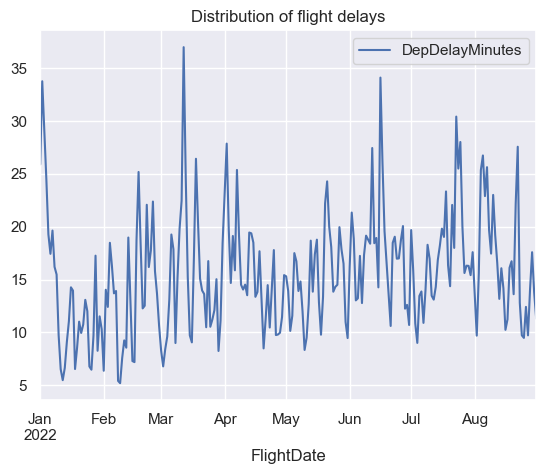

In [11]:
(df_flights
 .groupby("FlightDate")
 [["DepDelayMinutes"]]
 .mean()
 .plot(title="Distribution of flight delays"))

<AxesSubplot: title={'center': 'Distribution of flight delays'}, ylabel='Frequency'>

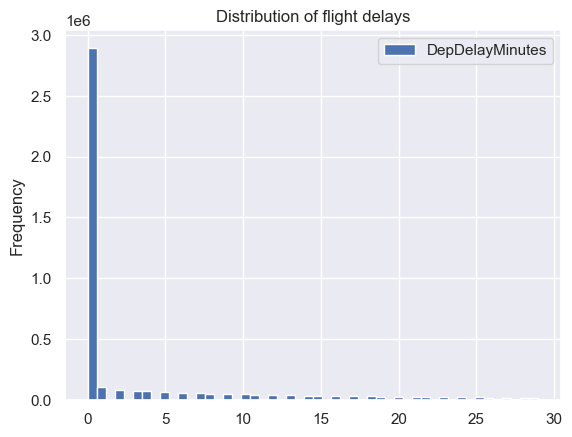

In [22]:
(df_flights
 .query("DepDelayMinutes < 30")
 [["DepDelayMinutes"]]
 #.mean()
 .plot(kind="hist", bins=50,title="Distribution of flight delays"))

In [13]:
(df_flights.
    query("DepDelayMinutes < 45"))

,FlightDate,Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,OriginStateName,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDel15,DepDelayMinutes,DepTimeBlk,TaxiOut,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime
0,2022-01-06,Delta Air Lines Inc.,N315DN,1581,11697,FLL,"Fort Lauderdale, FL",FL,Florida,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,1419,0.0,0.0,0.0,1400-1459,True,Airline/Carrier,False,173.0,0.0,1,1076.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-06,Delta Air Lines Inc.,N545US,1582,10397,ATL,"Atlanta, GA",GA,Georgia,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,1600-1659,15.0,1815.0,5.0,1821,1820.0,0.0,0.0,1800-1859,False,none,False,110.0,93.0,1,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-06,Delta Air Lines Inc.,N545US,1582,11697,FLL,"Fort Lauderdale, FL",FL,Florida,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,1900-1959,13.0,2104.0,10.0,2127,2116.0,0.0,0.0,2100-2159,False,none,False,116.0,83.0,1,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-06,Delta Air Lines Inc.,N345NB,1583,11697,FLL,"Fort Lauderdale, FL",FL,Florida,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1024,1019.0,-5.0,0.0,0.0,1000-1059,17.0,1209.0,3.0,1227,1212.0,0.0,0.0,1200-1259,False,none,False,123.0,93.0,1,680.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-06,Delta Air Lines Inc.,N978AT,1584,10397,ATL,"Atlanta, GA",GA,Georgia,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,1117,1113.0,-4.0,0.0,0.0,1100-1159,14.0,1127.0,4.0,1142,1131.0,0.0,0.0,1100-1159,False,none,False,85.0,60.0,1,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2022-01-06,Delta Air Lines Inc.,N978AT,1584,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,10397,ATL,"Atlanta, GA",GA,Georgia,1237,1230.0,-7.0,0.0,0.0,1200-1259,11.0,1430.0,5.0,1458,1435.0,0.0,0.0,1400-1459,False,none,False,81.0,49.0,1,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2022-01-06,Delta Air Lines Inc.,N878DN,1585,14524,RIC,"Richmond, VA",VA,Virginia,10397,ATL,"Atlanta, GA",GA,Georgia,900,857.0,-3.0,0.0,0.0,0900-0959,13.0,1030.0,8.0,1050,1038.0,0.0,0.0,1000-1059,False,none,False,110.0,80.0,1,481.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-01-06,Delta Air Lines Inc.,N596NW,1586,13487,MSP,"Minneapolis, MN",MN,Minnesota,14635,RSW,"Fort Myers, FL",FL,Florida,1000,1018.0,18.0,1.0,18.0,1000-1059,15.0,1431.0,4.0,1433,1435.0,2.0,0.0,1400-1459,False,none,False,213.0,178.0,1,1416.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2022-01-06,Delta Air Lines Inc.,N872DN,1587,10397,ATL,"Atlanta, GA",GA,Georgia,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1414,1422.0,8.0,0.0,8.0,1400-1459,11.0,1528.0,3.0,1533,1531.0,0.0,0.0,1500-1559,False,none,False,79.0,55.0,1,356.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2022-01-06,Delta Air Lines Inc.,N872DN,1587,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,10397,ATL,"Atlanta, GA",GA,Georgia,1643,1640.0,-3.0,0.0,0.0,1600-1659,12.0,1759.0,4.0,1814,1803.0,0.0,0.0,1800-1859,False,none,False,91.0,67.0,1,356.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
px.line(df_flights
 .groupby("FlightDate")
 [["DepDelayMinutes"]]
 .mean()
 )

#### Correlation [Pearson]

In [15]:
corr = (df_flights
        .select_dtypes('float16')
        .corr())
corr.style.background_gradient(cmap='coolwarm')

,DepTime,DepDelay,DepDel15,DepDelayMinutes,TaxiOut,WheelsOn,TaxiIn,ArrTime,ArrDelayMinutes,ArrDel15,CRSElapsedTime,AirTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime
DepTime,1.000000,0.133076,0.250080,0.129948,0.131614,0.693240,0.063722,0.663341,0.120610,0.222469,-0.013604,0.091511,-0.004102,0.039401,0.021194,0.057190,0.004569,0.127657,0.040475,0.024034
DepDelay,0.133076,1.000000,0.548335,0.997910,0.051616,0.036071,0.017112,0.029398,0.972308,0.508926,0.022724,0.028413,0.021589,0.731257,0.275693,0.242059,0.038098,0.591870,0.194756,0.195455
DepDel15,0.250080,0.548335,1.000000,0.530038,0.061194,0.123818,0.007356,0.112351,0.485089,0.747034,0.029611,0.049983,0.033488,0.289182,0.108302,0.169526,0.030617,0.375331,0.131456,0.102410
DepDelayMinutes,0.129948,0.997910,0.530038,1.000000,0.054493,0.035403,0.022915,0.029179,0.975506,0.494021,0.018152,0.026230,0.016364,0.736442,0.277687,0.240199,0.037885,0.592094,0.194445,0.196090
TaxiOut,0.131614,0.051616,0.061194,0.054493,1.000000,0.152091,0.073699,0.148759,0.154931,0.244984,0.076168,0.122944,0.037387,0.045944,0.054930,0.293551,0.002973,0.035166,0.018473,0.019728
WheelsOn,0.693240,0.036071,0.123818,0.035403,0.152091,1.000000,0.095980,0.966094,0.039863,0.118113,0.015502,0.124570,0.016844,0.001937,0.009138,0.048203,0.002280,0.035357,-0.008364,-0.020983
TaxiIn,0.063722,0.017112,0.007356,0.022915,0.073699,0.095980,1.000000,0.096328,0.095400,0.151333,0.094655,0.124435,0.071899,0.017157,0.017289,0.217296,0.001523,0.024135,-0.000705,-0.002943
ArrTime,0.663341,0.029398,0.112351,0.029179,0.148759,0.966094,0.096328,1.000000,0.033588,0.107704,0.012994,0.121106,0.013522,-0.000006,0.008498,0.044150,0.002122,0.029027,-0.010242,-0.021792
ArrDelayMinutes,0.120610,0.972308,0.485089,0.975506,0.154931,0.039863,0.095400,0.033588,1.000000,0.530604,0.011734,0.033710,0.010855,0.735698,0.287298,0.328339,0.038140,0.586642,0.181922,0.182758
ArrDel15,0.222469,0.508926,0.747034,0.494021,0.244984,0.118113,0.151333,0.107704,0.530604,1.000000,0.019573,0.065902,0.025041,0.304129,0.111748,0.321830,0.032743,0.382751,0.113747,0.084664


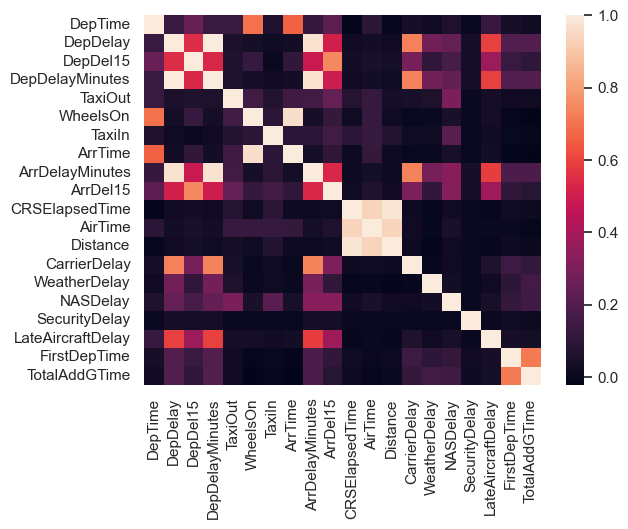

In [16]:
sns.heatmap(
    (df_flights
     .select_dtypes('float16')
     .corr()))
plt.show()


<AxesSubplot: xlabel='FlightDate'>

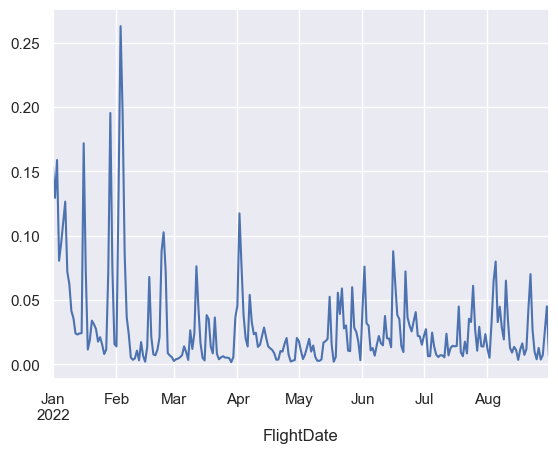

In [17]:
(df_flights.
 groupby("FlightDate")
 ["Cancelled"]
 .agg("mean")
 .plot()
 )


<AxesSubplot: xlabel='FlightDate'>

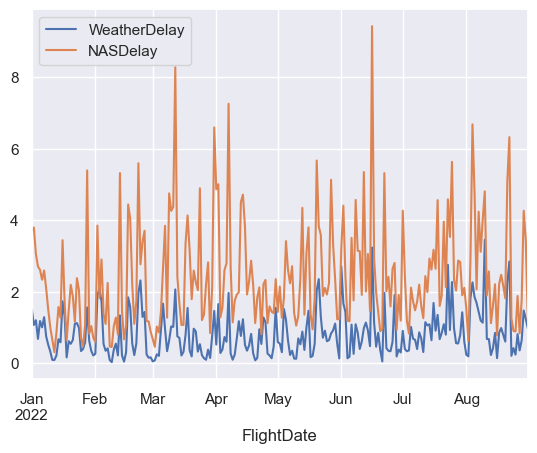

In [18]:
(df_flights.
 groupby("FlightDate")
[["WeatherDelay", "NASDelay"]]
 .agg("mean")
 .plot())

<AxesSubplot: xlabel='FlightDate'>

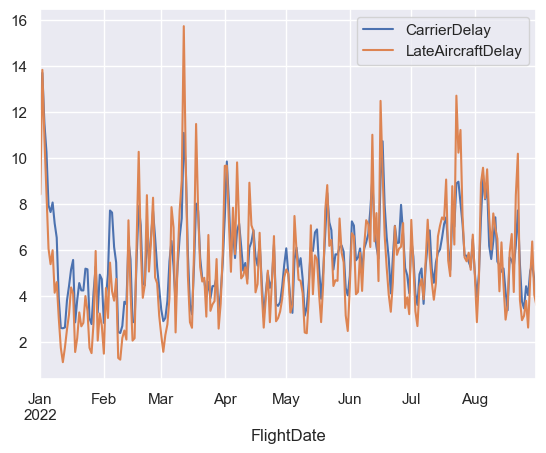

In [19]:
(df_flights.
 groupby("FlightDate")
 [["CarrierDelay","LateAircraftDelay"]]
 .agg("mean")
 .plot())

##### Frequency Distribution Table

In [20]:
(df_flights
 [["Operating_Airline"]]
 .value_counts()
.sort_values(ascending=False)
.to_frame("Row Count")
)

,Row Count
Operating_Airline,
Southwest Airlines Co.,850814
Delta Air Lines Inc.,590787
American Airlines Inc.,574280
SkyWest Airlines Inc.,504520
United Air Lines Inc.,406927
Republic Airlines,224567
JetBlue Airways,179893
Envoy Air,172616
Endeavor Air Inc.,162517


In [21]:
px.bar(
    df_flights["Operating_Airline"]
    .value_counts()
    .sort_values(ascending=True), 
    orientation='h', 
    template="plotly_dark",
    title="Flights per airline",
    height=700,
    )